### Notebook for checking it the responses from the LLM are varied

In [4]:
import json
from pprint import pprint
import os
import sys
import importlib

# Add the "scripts" directory to sys.path
current_dir = os.path.dirname(os.path.abspath("__file__"))
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
scripts_dir = os.path.join(parent_dir, 'scripts')
sys.path.append(scripts_dir)
import LLAMAconnect

In [12]:
# It is important not to use short names of institutes, like IB for institute of biology, because the LLM will not be able to assign the students to the correct institute.
places ={
    'leisure': ["bar", "movie_theater", "shopping_mall"],
    'eating': ["restaurant", "bakery", "cafe"],
    'shopping': ["store", "drugstore", "supermarket"],
    'sports': ["gym"],
    'institute': ["Institute of Biology", "Institute of Computing", "Institute of Geociences", "Institute of Philosophy and Human Sciences", "Institute of Chemistry"],
    'university': ["University of Campinas"],
}

student_info = "The student is geography student. Today, the student is going to have lunch at a restaurant and the student is going to the supermarket."
importlib.reload(LLAMAconnect)
responses = LLAMAconnect.generate_response_trips(student_info, places, number_of_trips=20) # number of trips defaults to 5
pprint(json.loads(responses[0]))

  0%|          | 0/20 [00:00<?, ?it/s]

Error: Invalid location generated 'reisdntant'
Invalid response. Generating a new one.


  5%|▌         | 1/20 [00:01<00:21,  1.15s/it]

Error: Invalid location generated 'Institute of Geography and Human Sciences'
Invalid response. Generating a new one.


 10%|█         | 2/20 [00:02<00:20,  1.14s/it]

Error: Invalid location generated 'Institute of Geography and Human Sciences'
Invalid response. Generating a new one.


 15%|█▌        | 3/20 [00:03<00:20,  1.18s/it]

Error: Invalid location generated 'Institute of Geography and Human Sciences'
Invalid response. Generating a new one.


 35%|███▌      | 7/20 [00:06<00:10,  1.30it/s]

Error: Invalid location generated 'Institute of Geography'
Invalid response. Generating a new one.


 55%|█████▌    | 11/20 [00:09<00:06,  1.47it/s]

Error: Invalid location generated 'Institute of Geography'
Invalid response. Generating a new one.


 80%|████████  | 16/20 [00:22<00:09,  2.40s/it]

Error: Invalid location generated 'Institute of Geography'
Invalid response. Generating a new one.


 85%|████████▌ | 17/20 [00:27<00:10,  3.36s/it]

Error: The response is missing some hours
Invalid response. Generating a new one.
Error: Invalid location generated 'Institute of Geography and Human Sciences'
Invalid response. Generating a new one.


100%|██████████| 20/20 [00:41<00:00,  2.09s/it]

{'10': {'activity': 'study', 'location': 'Institute of Geociences'},
 '11': {'activity': 'study', 'location': 'Institute of Geociences'},
 '12': {'activity': 'lunch', 'location': 'restaurant'},
 '13': {'activity': 'study', 'location': 'Institute of Geociences'},
 '14': {'activity': 'shopping', 'location': 'store'},
 '15': {'activity': 'shopping', 'location': 'store'},
 '16': {'activity': 'practice sports', 'location': 'gym'},
 '17': {'activity': 'leisure', 'location': 'restaurant'},
 '18': {'activity': 'dinner', 'location': 'restaurant'},
 '19': {'activity': 'relaxation', 'location': 'home'},
 '20': {'activity': 'rest', 'location': 'home'},
 '21': {'activity': 'relaxation', 'location': 'home'},
 '22': {'activity': 'relaxation', 'location': 'home'},
 '23': {'activity': 'sleep', 'location': 'home'},
 '7': {'activity': 'wake up', 'location': 'home'},
 '8': {'activity': 'study', 'location': 'Institute of Geociences'},
 '9': {'activity': 'breakfast', 'location': 'cafe'}}


In [13]:
location_time_list = {}
for i in range(len(responses)):
    json_response = json.loads(responses[i])
    location_time_list[i] = json_response

pprint(location_time_list)

{0: {'10': {'activity': 'study', 'location': 'Institute of Geociences'},
     '11': {'activity': 'study', 'location': 'Institute of Geociences'},
     '12': {'activity': 'lunch', 'location': 'restaurant'},
     '13': {'activity': 'study', 'location': 'Institute of Geociences'},
     '14': {'activity': 'shopping', 'location': 'store'},
     '15': {'activity': 'shopping', 'location': 'store'},
     '16': {'activity': 'practice sports', 'location': 'gym'},
     '17': {'activity': 'leisure', 'location': 'restaurant'},
     '18': {'activity': 'dinner', 'location': 'restaurant'},
     '19': {'activity': 'relaxation', 'location': 'home'},
     '20': {'activity': 'rest', 'location': 'home'},
     '21': {'activity': 'relaxation', 'location': 'home'},
     '22': {'activity': 'relaxation', 'location': 'home'},
     '23': {'activity': 'sleep', 'location': 'home'},
     '7': {'activity': 'wake up', 'location': 'home'},
     '8': {'activity': 'study', 'location': 'Institute of Geociences'},
     '9'

In [14]:
times = {}
locations = []
for i in range(len(location_time_list[0])):
    
    times[i + 7] = {}
    for j in range(len(location_time_list)):
        local = location_time_list[j][f'{i + 7}']['location']
        if local not in locations:
            locations.append(local)
        try:
            times[i + 7][f'{local}'] += 1 
        except KeyError:
            times[i + 7][f'{local}'] = 1

    for key in times[i + 7]:
        times[i + 7][key] /= len(location_time_list) / 100

pprint(locations)

['home',
 'Institute of Geociences',
 'Institute of Philosophy and Human Sciences',
 'cafe',
 'restaurant',
 'store',
 'supermarket',
 'gym',
 'bakery',
 'movie_theater',
 'bar']


In [15]:
mermaid_code = "graph TD\n"
for key, values in times.items():
    for val, prob in values.items():
        val = val.replace(" ", "_")
        if key == 7:
            # Starting key node
            mermaid_code += f"{key}((7)) --> {key}_{val}({val})\n"
        else:
            for prev_val in times[key - 1]:
                prev_val = prev_val.replace(" ", "_")
                mermaid_code += f"{key - 1}_{prev_val} --> |{prob}%| {key}_{val}({val})\n"

with open ("mermaid_code.txt", "w") as f:
    f.write(mermaid_code)
print(mermaid_code)

graph TD
7((7)) --> 7_home(home)
7_home --> |55.0%| 8_Institute_of_Geociences(Institute_of_Geociences)
7_home --> |45.0%| 8_Institute_of_Philosophy_and_Human_Sciences(Institute_of_Philosophy_and_Human_Sciences)
8_Institute_of_Geociences --> |20.0%| 9_cafe(cafe)
8_Institute_of_Philosophy_and_Human_Sciences --> |20.0%| 9_cafe(cafe)
8_Institute_of_Geociences --> |20.0%| 9_Institute_of_Philosophy_and_Human_Sciences(Institute_of_Philosophy_and_Human_Sciences)
8_Institute_of_Philosophy_and_Human_Sciences --> |20.0%| 9_Institute_of_Philosophy_and_Human_Sciences(Institute_of_Philosophy_and_Human_Sciences)
8_Institute_of_Geociences --> |40.0%| 9_Institute_of_Geociences(Institute_of_Geociences)
8_Institute_of_Philosophy_and_Human_Sciences --> |40.0%| 9_Institute_of_Geociences(Institute_of_Geociences)
8_Institute_of_Geociences --> |20.0%| 9_home(home)
8_Institute_of_Philosophy_and_Human_Sciences --> |20.0%| 9_home(home)
9_cafe --> |60.0%| 10_Institute_of_Geociences(Institute_of_Geociences)
9_Inst

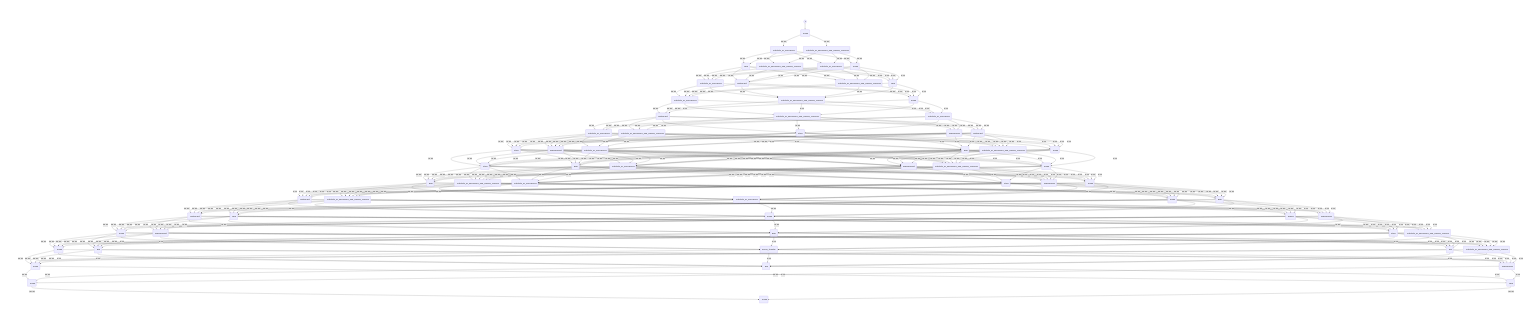